In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd

In [3]:
iris_dataframe = pd.read_csv('Iris.csv')

iris_dataframe.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
27,5.2,3.5,1.5,0.2,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
73,6.1,2.8,4.7,1.2,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
17,5.1,3.5,1.4,0.3,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris_dataframe.isna().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [6]:
iris_dataframe.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [7]:
print("There is no null/na values present in the dataset")

There is no null/na values present in the dataset




## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
label_encoder.fit(iris_dataframe['Class'])
iris_dataframe['Class'] = label_encoder.transform(iris_dataframe['Class'])

iris_dataframe.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
2,4.7,3.2,1.3,0.2,0
99,5.7,2.8,4.1,1.3,1
40,5.0,3.5,1.3,0.3,0
144,6.7,3.3,5.7,2.5,2
15,5.7,4.4,1.5,0.4,0
67,5.8,2.7,4.1,1.0,1
82,5.8,2.7,3.9,1.2,1
135,7.7,3.0,6.1,2.3,2
129,7.2,3.0,5.8,1.6,2
74,6.4,2.9,4.3,1.3,1


In [10]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
list(label_encoder.inverse_transform([2, 2, 1,0]))

['Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [54]:
# We can check the above from below
(iris_dataframe.corr() > -0.1) & (iris_dataframe.corr() < 0.1)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),False,False,False,False
Sepal Width in (cm),False,False,False,False
Petal length (in cm),False,False,False,False
Petal width (in cm),False,False,False,False


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [13]:
iris_dataframe.var() < 0.1

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

## Question 6

*Plot the scatter matrix for all the variables.*

In [14]:
import seaborn as sns

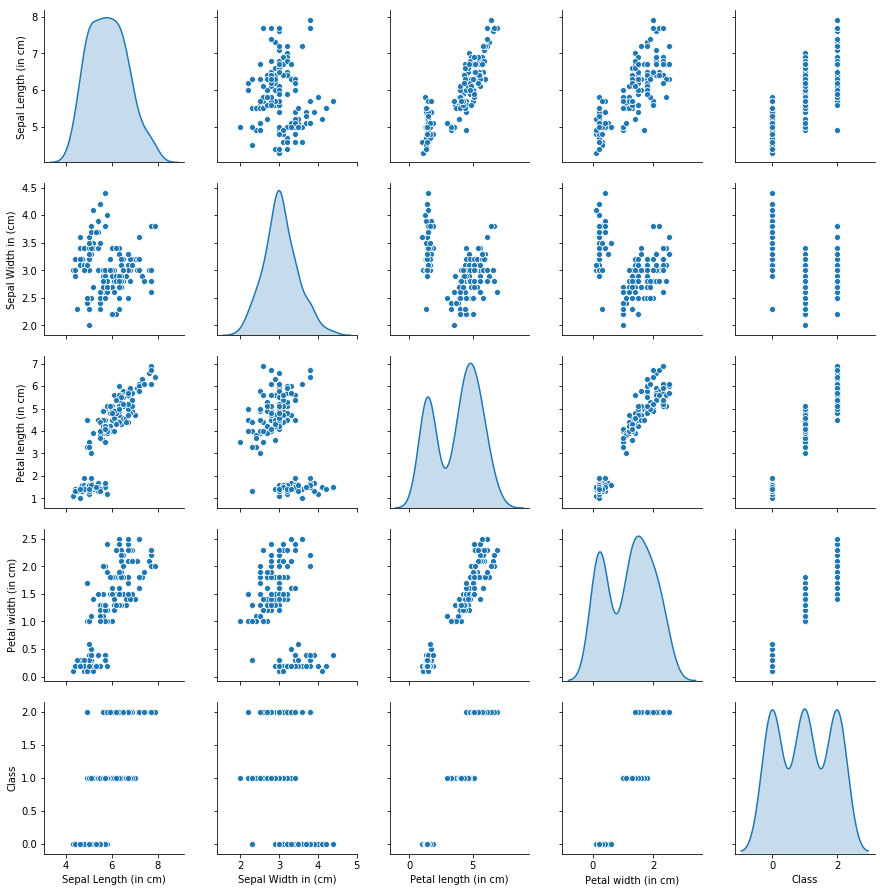

In [45]:
sns.pairplot(data=iris_dataframe, diag_kind='kde')

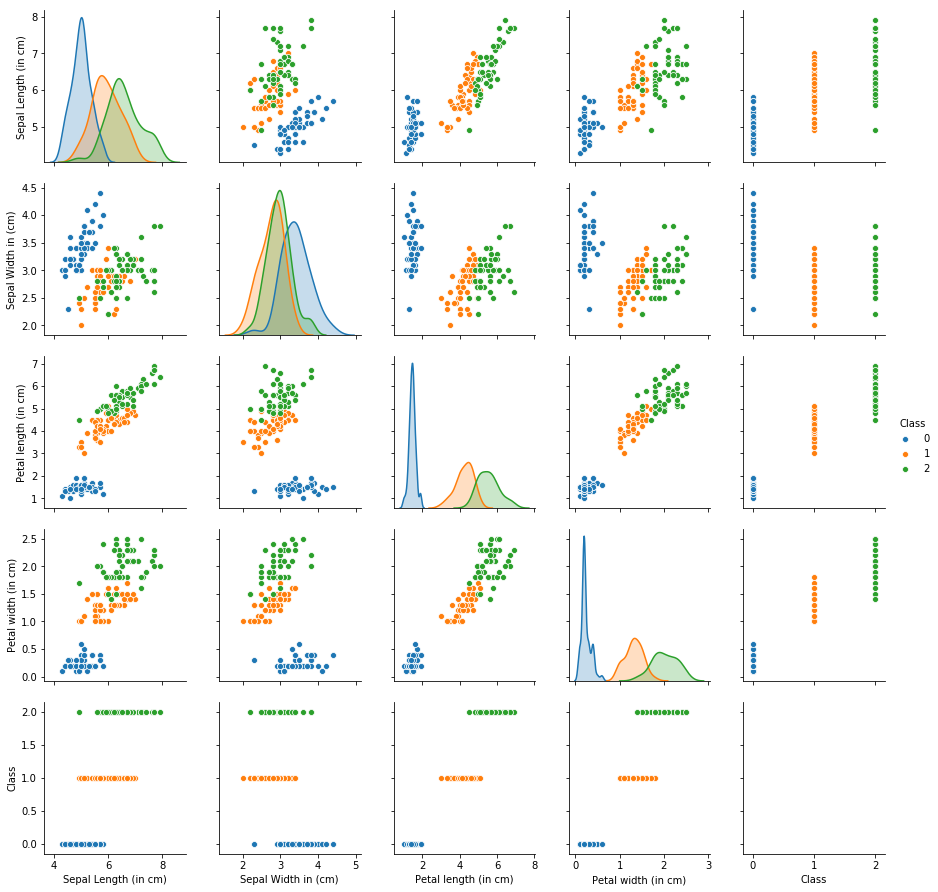

In [44]:
#pair plot with hue
sns.pairplot(data=iris_dataframe, diag_kind='kde', hue='Class')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [16]:
X = iris_dataframe.drop(columns='Class', inplace=False)

X.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = iris_dataframe['Class']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [35]:
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (120, 4)
Shape of y_train =  (120,)
Shape of X_test =  (30, 4)
Shape of y_test =  (30,)


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# fitting standard scaler model
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
# scaling values
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
for number_of_neighbor in [3,5,9]:
    knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbor)
    knn_model.fit(X_train_scaled, y_train)
    print("Accuracy for k = %s is %s" %(number_of_neighbor, accuracy_score(y_test, knn_model.predict(X_test_scaled))))

Accuracy for k = 3 is 0.9333333333333333
Accuracy for k = 5 is 0.9666666666666667
Accuracy for k = 9 is 0.9666666666666667


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [26]:
import numpy as np

In [52]:
# optimum K. As we are starting from K=1
optimal_K = 1

# any model can have maximum SME error = 1
optimal_model_error = 1

# Dataframe for storing k and MSE
MSE_dataframe = pd.DataFrame(index=np.arange(1,20,2), columns=['K', 'MSE'])

for number_of_neighbor in np.arange(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbor)    
    knn_model.fit(X_train_scaled, y_train)    
    test_prediction = knn_model.predict(X_test_scaled)    
    test_error = 1 - accuracy_score(y_test, test_prediction)    
    MSE_dataframe.loc[number_of_neighbor]['MSE'] = test_error
    MSE_dataframe.loc[number_of_neighbor]['K'] = number_of_neighbor    
    if(test_error < optimal_model_error):
        optimal_model_error = test_error
        optimal_K = number_of_neighbor
    
print("The optimal number of neighbour is ", optimal_K)

The optimal number of neighbour is  7


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'MSE')

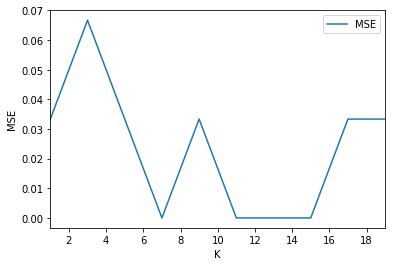

In [43]:
MSE_dataframe.plot(x='K', y='MSE')
plt.xlabel("K")
plt.ylabel("MSE")


In [53]:
MSE_dataframe

,K,MSE
1,1,0.0333333
3,3,0.0666667
5,5,0.0333333
7,7,0
9,9,0.0333333
11,11,0
13,13,0
15,15,0
17,17,0.0333333
19,19,0.0333333


In [48]:
#converting dataframe back
iris_dataframe['Class'] = label_encoder.inverse_transform(iris_dataframe['Class'])